# Extending Linear Regression to Non-Linear Relationships

## Transforming Data Using Basis Functions

- Basis functions allow the transformation of original input features into a new feature space that enables modeling of non-linear relationships.
- Common basis functions include **polynomial functions**, **Gaussian functions**, and other custom transformations.

## Learning a Linear Regression on Transformed Features

- Linear regression can be applied to the transformed features, enabling the model to learn complex, non-linear relationships.
- This approach maintains the interpretability and simplicity of linear regression while improving its flexibility and expressive power.

---

## Polynomial Regression: Univariate

### Polynomial Regression Hypothesis

For a polynomial of degree $m$, the hypothesis is defined as:

$$
h(x; \mathbf{w}) = w_0 + w_1 x^1 + \cdots + w_{m-1} x^{m-1} + w_m x^m
$$

### Objective

The goal is to fit a polynomial of degree $m$ to a set of training data points.

---

## Matrix Representation

Similar to univariate linear regression, the matrix representation of the model becomes:

$$
\mathbf{X'} = 
\begin{bmatrix}
1 & x^{(1)^1} & \cdots & x^{(1)^m} \\
1 & x^{(2)^1} & \cdots & x^{(2)^m} \\
\vdots & \vdots & \ddots & \vdots \\
1 & x^{(n)^1} & \cdots & x^{(n)^m}
\end{bmatrix},
\quad
\mathbf{w} = 
\begin{bmatrix}
\hat{w}_0 \\
\hat{w}_1 \\
\vdots \\
\hat{w}_m
\end{bmatrix},
\quad
\mathbf{y} = 
\begin{bmatrix}
y^{(1)} \\
\vdots \\
y^{(n)}
\end{bmatrix}
$$

Here, $x^{(i)}$ denotes the $i$-th training data point.

---

## Polynomial Regression Analytical Solution: Univariate

Rewriting the **Sum of Squared Errors (SSE)** cost function in matrix form:

$$
J(\mathbf{w}) = \|\mathbf{y} - \mathbf{X'}\mathbf{w}\|_2^2
$$

### Analytical Solution

The optimal weight vector $\hat{\mathbf{w}}$ is computed using the normal equation:

$$
\hat{\mathbf{w}} = \left(\mathbf{X'}^T \mathbf{X'}\right)^{-1} \mathbf{X'}^T \mathbf{y}
$$

This provides a closed-form solution to the polynomial regression problem in the univariate case.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
# Function to generate polynomial features
def polynomial_features(X, degree):
    """Transform input array X into a polynomial feature matrix."""
    X_poly = np.ones((len(X), 1))  # Add a column of 1s for the intercept
    for i in range(1, degree + 1):
        X_poly = np.column_stack((X_poly, X**i))  # Add X^i column
    return X_poly

In [3]:
# Function to perform polynomial regression
def polynomial_regression(X, y, degree):
    """Fit a polynomial regression model of specified degree."""
    X_poly = polynomial_features(X.reshape(-1, 1), degree)
    # Closed-form solution: w = (X^T * X)^-1 * X^T * y
    w = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
    return w

In [5]:
# Function to generate synthetic non-linear data
def generate_nonlinear_data(n=100, noise_level=3.0):
    """Generate non-linear data: y = 2x^2 - 5x + 3 + noise."""
    np.random.seed(42)
    X = np.linspace(-3, 3, n)
    # True function: y = 2x^2 - 5x + 3
    true_a, true_b, true_c = 2, -5, 3
    noise = np.random.randn(n) * noise_level
    y = true_a * X**2 + true_b * X + true_c + noise
    return X, y

In [6]:
# Function to make predictions with a polynomial model
def predict(X, w):
    """Make predictions using the polynomial model."""
    X_poly = polynomial_features(X.reshape(-1, 1), len(w)-1)
    return X_poly @ w

In [7]:
# Function to calculate RMSE (Root Mean Squared Error)
def compute_rmse(y_true, y_pred):
    """Calculate RMSE between true and predicted values."""
    return np.sqrt(mean_squared_error(y_true, y_pred))


In [11]:
# Generate non-linear data
X, y = generate_nonlinear_data(n=50, noise_level=5.0)

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degrees to evaluate (1 to 20)
degrees = list(range(1, 21))
train_rmses, test_rmses = [], []

# Create a smooth grid of X values for plotting the fit lines
X_fit = np.linspace(X.min(), X.max(), 1000)

# Fit models of all degrees and calculate errors
for degree in degrees:
    # Fit polynomial regression
    w = polynomial_regression(X_train, y_train, degree)
    
    # Make predictions
    y_train_pred = predict(X_train, w)
    y_test_pred = predict(X_test, w)
    
    # Calculate RMSE
    train_rmse = compute_rmse(y_train, y_train_pred)
    test_rmse = compute_rmse(y_test, y_test_pred)
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)

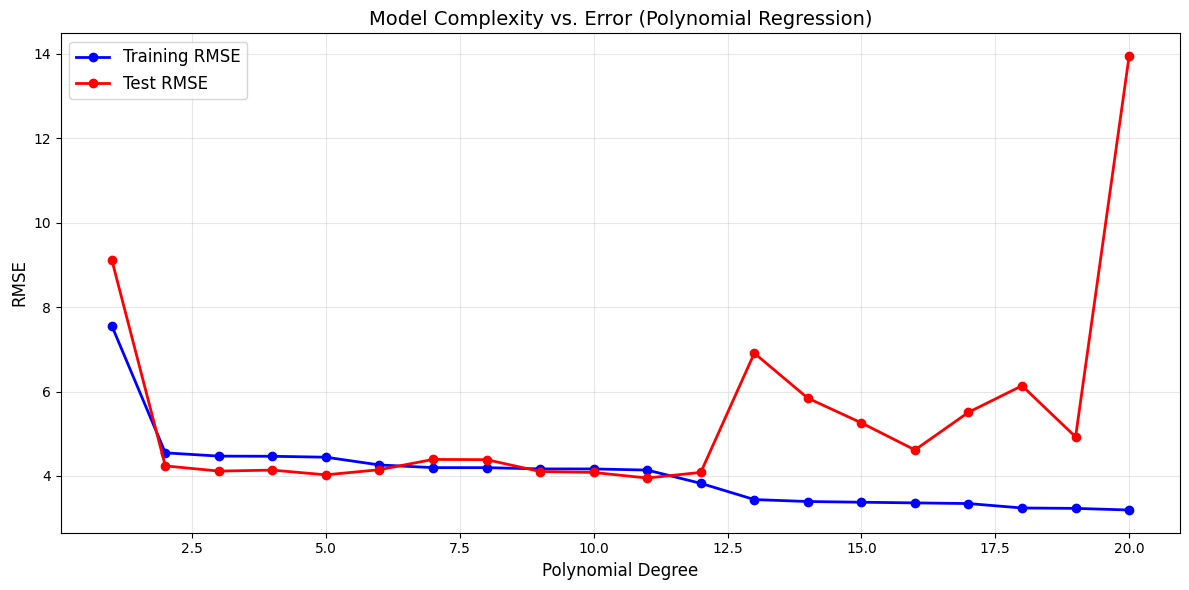

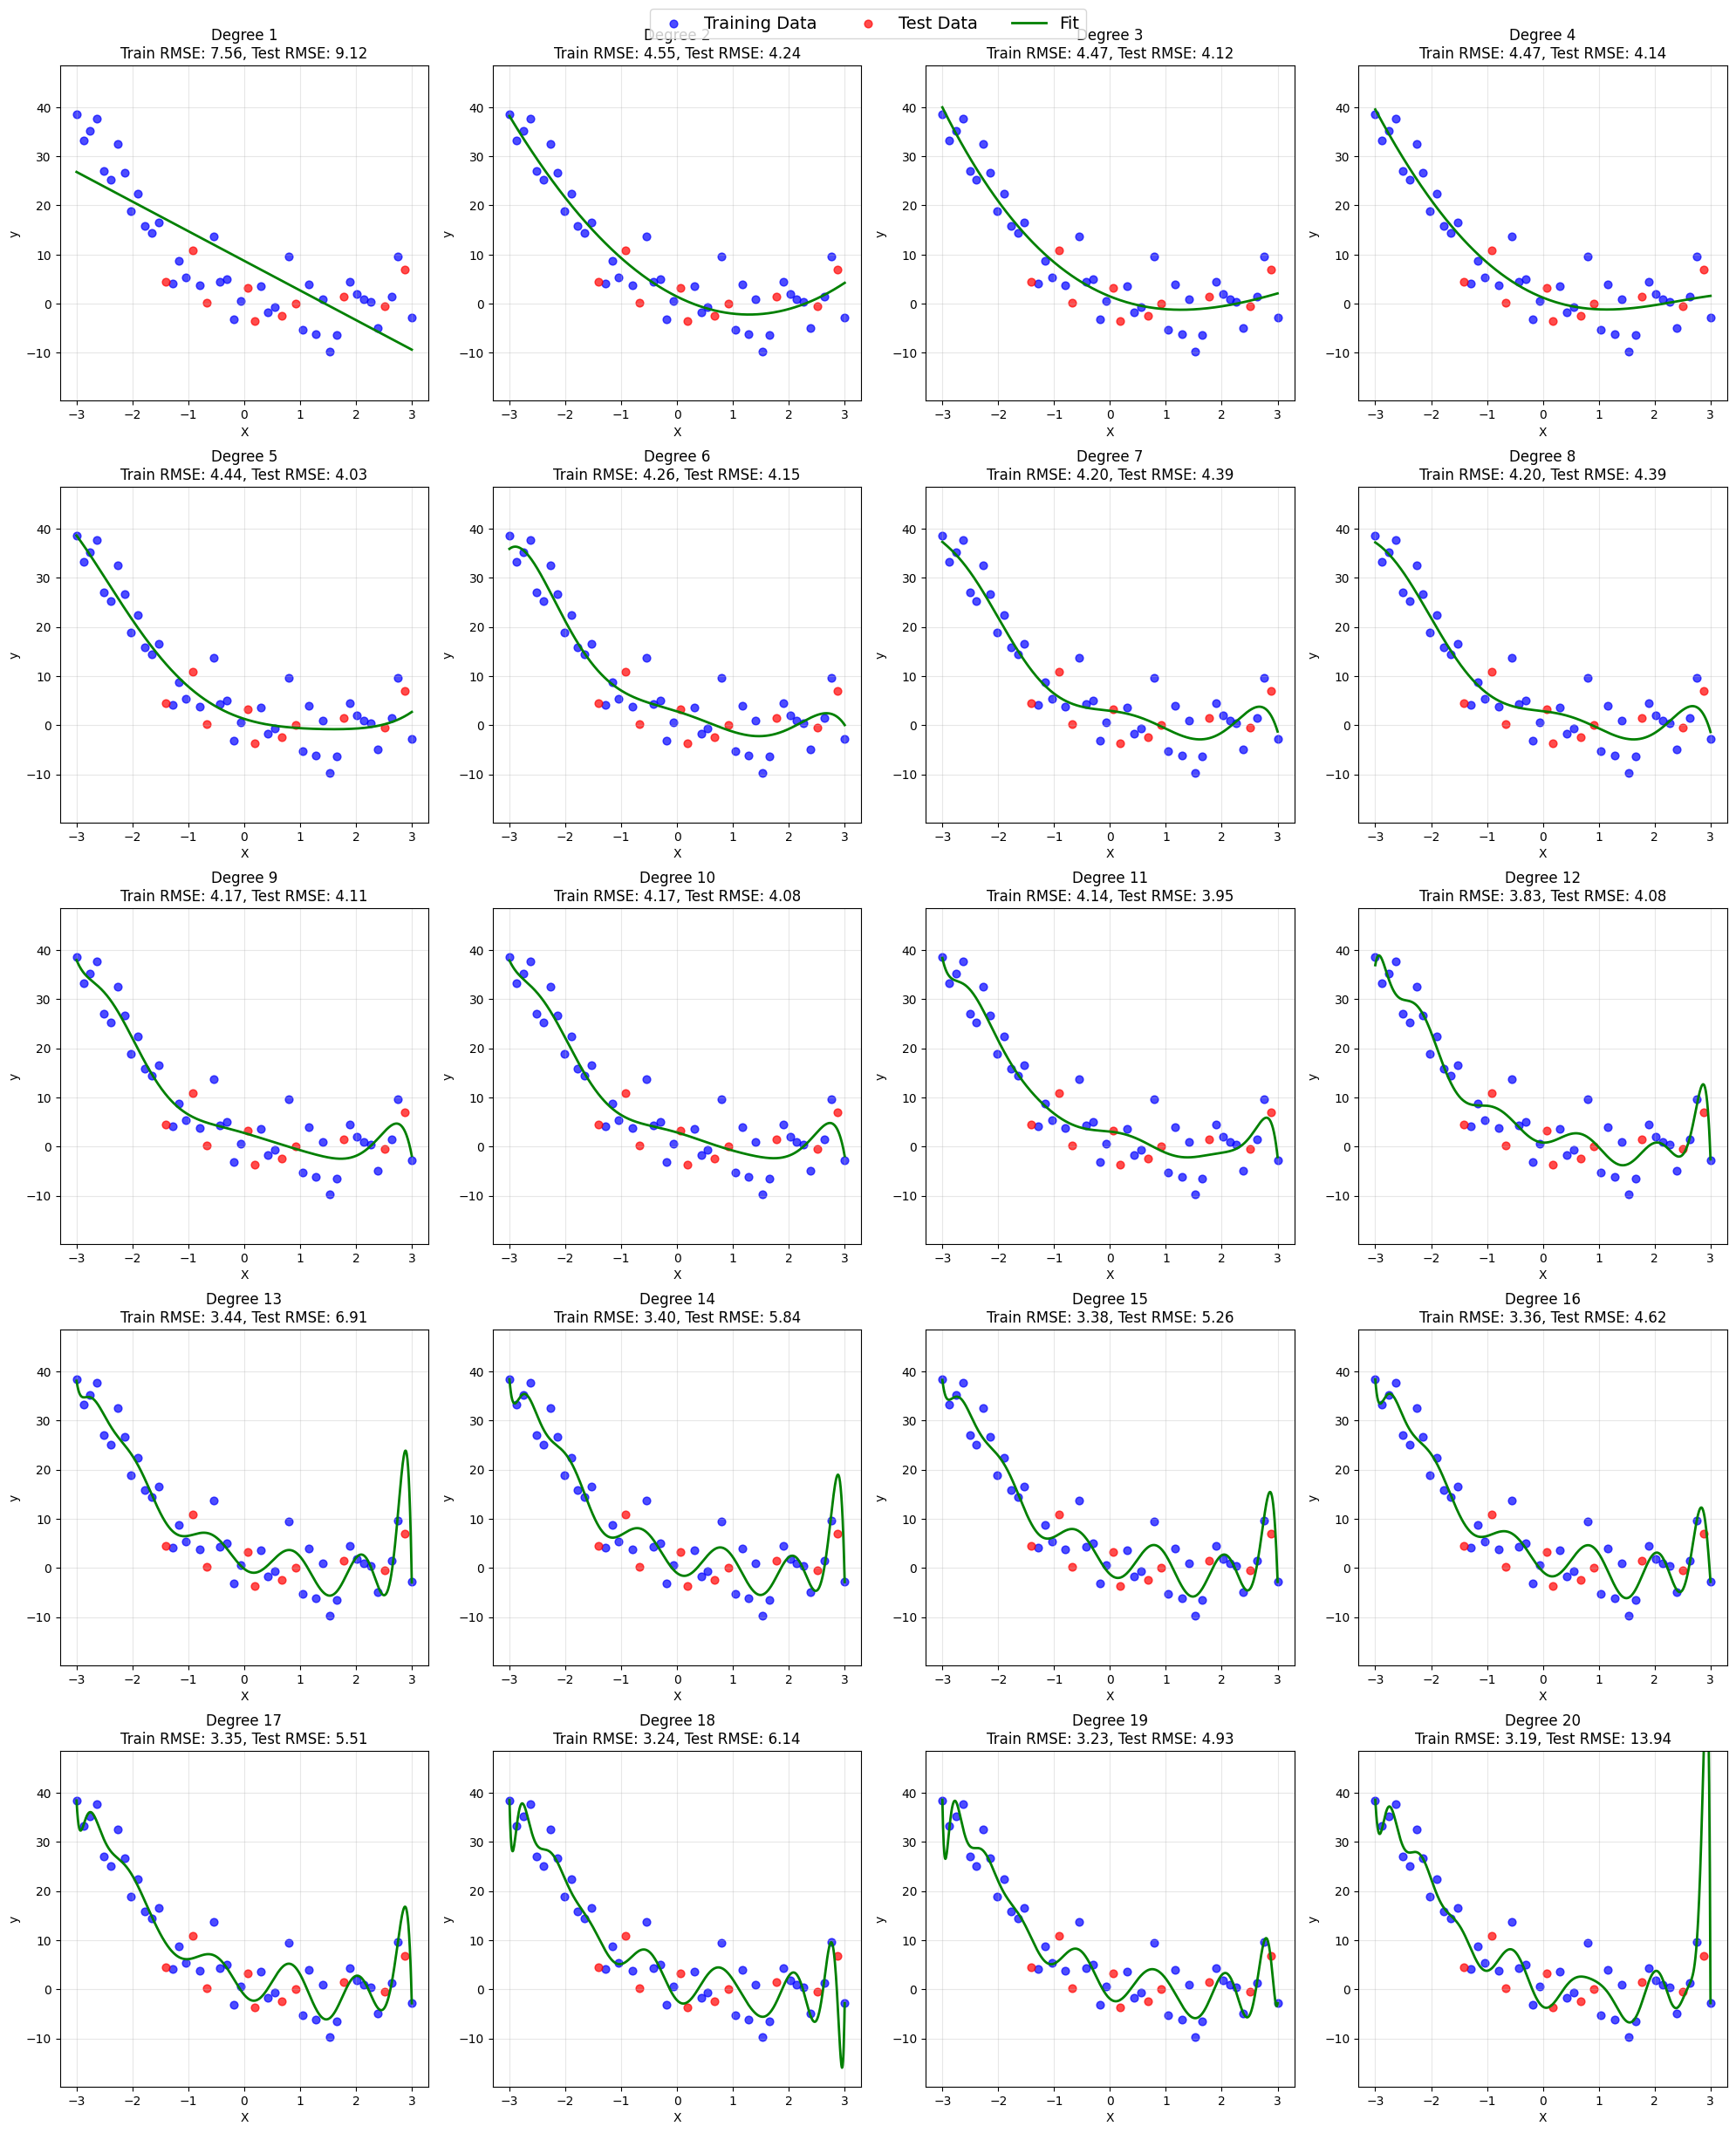


Best polynomial degree based on test RMSE: 11
Corresponding test RMSE: 3.95
Training RMSE at this degree: 4.14


In [12]:
# Plot RMSE vs Degree curve first
plt.figure(figsize=(12, 6))
plt.plot(degrees, train_rmses, 'o-', color='blue', linewidth=2, label='Training RMSE')
plt.plot(degrees, test_rmses, 'o-', color='red', linewidth=2, label='Test RMSE')
plt.title('Model Complexity vs. Error (Polynomial Regression)', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# Now create individual plots for all 20 degrees
# Use a 5x4 grid layout (5 rows, 4 columns = 20 plots)
fig, axes = plt.subplots(5, 4, figsize=(20, 25))
axes = axes.flatten()  # Flatten to make it easier to iterate

for i, degree in enumerate(degrees):
    ax = axes[i]
    
    # Fit model
    w = polynomial_regression(X_train, y_train, degree)
    y_fit_pred = predict(X_fit, w)
    
    # Plot data and fit
    ax.scatter(X_train, y_train, color='blue', alpha=0.7, s=40, label='Training Data')
    ax.scatter(X_test, y_test, color='red', alpha=0.7, s=40, label='Test Data')
    ax.plot(X_fit, y_fit_pred, color='green', linewidth=2, label=f'Fit')
    
    # Add titles and labels
    ax.set_title(f'Degree {degree}\nTrain RMSE: {train_rmses[i]:.2f}, Test RMSE: {test_rmses[i]:.2f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    
    # Keep y-axis consistent to better see the differences in fits
    ax.set_ylim([y.min() - 10, y.max() + 10])
    
    # Add grid
    ax.grid(True, alpha=0.3)

# Add a common legend for all subplots to avoid repetition
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.98), ncol=3, fontsize=14)

plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Make room for the common legend
plt.show()

# Print where minimum test error occurs
best_degree = degrees[np.argmin(test_rmses)]
print(f"\nBest polynomial degree based on test RMSE: {best_degree}")
print(f"Corresponding test RMSE: {min(test_rmses):.2f}")
print(f"Training RMSE at this degree: {train_rmses[best_degree-1]:.2f}")

## Polynomial Regression Model Analysis

### Understanding Model Performance

In polynomial regression, it is important to select the appropriate polynomial degree that achieves a good balance between **underfitting** and **overfitting**. The following analysis outlines three common scenarios in the context of model complexity.

---

#### 1. Optimal Model (Best Balance)

The polynomial degree that achieves the **lowest test RMSE** is considered the optimal complexity for the dataset. This model:

- Balances **bias** and **variance**
- Generalizes well to unseen data
- Typically exhibits **similar training and test errors**

**Optimal model:**
- Degree: **{best_degree}**
- Test RMSE: **{best_test_rmse:.2f}**
- Training RMSE: **{best_train_rmse:.2f}**
- Gap (Test - Train): **{best_test_rmse - best_train_rmse:.2f}**

---

#### 2. Underfitting Model (High Bias)

A low-degree polynomial often fails to capture the underlying data distribution, leading to underfitting. This model:

- Is too simplistic to represent the data
- Has **high error** on both training and test sets
- Shows **high bias** and **low variance**

**Most underfitting model:**
- Degree: **{underfit_degree}**
- Test RMSE: **{underfit_test_rmse:.2f}**
- Training RMSE: **{underfit_train_rmse:.2f}**
- Gap (Test - Train): **{underfit_test_rmse - underfit_train_rmse:.2f}**

---

#### 3. Overfitting Model (High Variance)

A high-degree polynomial may fit the training data too closely, including noise. This model:

- Memorizes the training data instead of generalizing
- Has **low training error** but **high test error**
- Shows **low bias** and **high variance**

**Most overfitting model:**
- Degree: **{overfit_degree}**
- Test RMSE: **{overfit_test_rmse:.2f}**
- Training RMSE: **{overfit_train_rmse:.2f}**
- Gap (Test - Train): **{overfit_gap:.2f}**

---

### The Bias-Variance Tradeoff

As model complexity increases (e.g., higher polynomial degree):

- **Training error** tends to decrease
- **Test error** typically follows a **U-shaped curve**:
  - Decreases initially as the model captures true structure
  - Increases beyond the optimal point due to overfitting
- The **gap between test and train RMSE** widens as variance increases

---

### Practical Implications

1. Always assess performance on a separate **test set** to evaluate generalization.
2. Prefer the **simplest model** that captures the underlying trend (Occam’s Razor).
3. Use **cross-validation** to select the optimal polynomial degree.
4. Apply **regularization techniques** (e.g., Ridge, Lasso) to mitigate overfitting when using high-degree polynomials.



POLYNOMIAL REGRESSION MODEL ANALYSIS

OPTIMAL MODEL:
Best performing degree: 11
Test RMSE: 3.95
Training RMSE: 4.14
Gap (Test - Train): -0.19

MOST UNDERFITTING MODEL:
Most underfitting degree: 1
Test RMSE: 9.12
Training RMSE: 7.56
Gap (Test - Train): 1.56
* High error on both training and test data indicates underfitting

MOST OVERFITTING MODEL:
Most overfitting degree: 20
Test RMSE: 13.94
Training RMSE: 3.19
Gap (Test - Train): 10.75
* Large gap between training and test error indicates overfitting


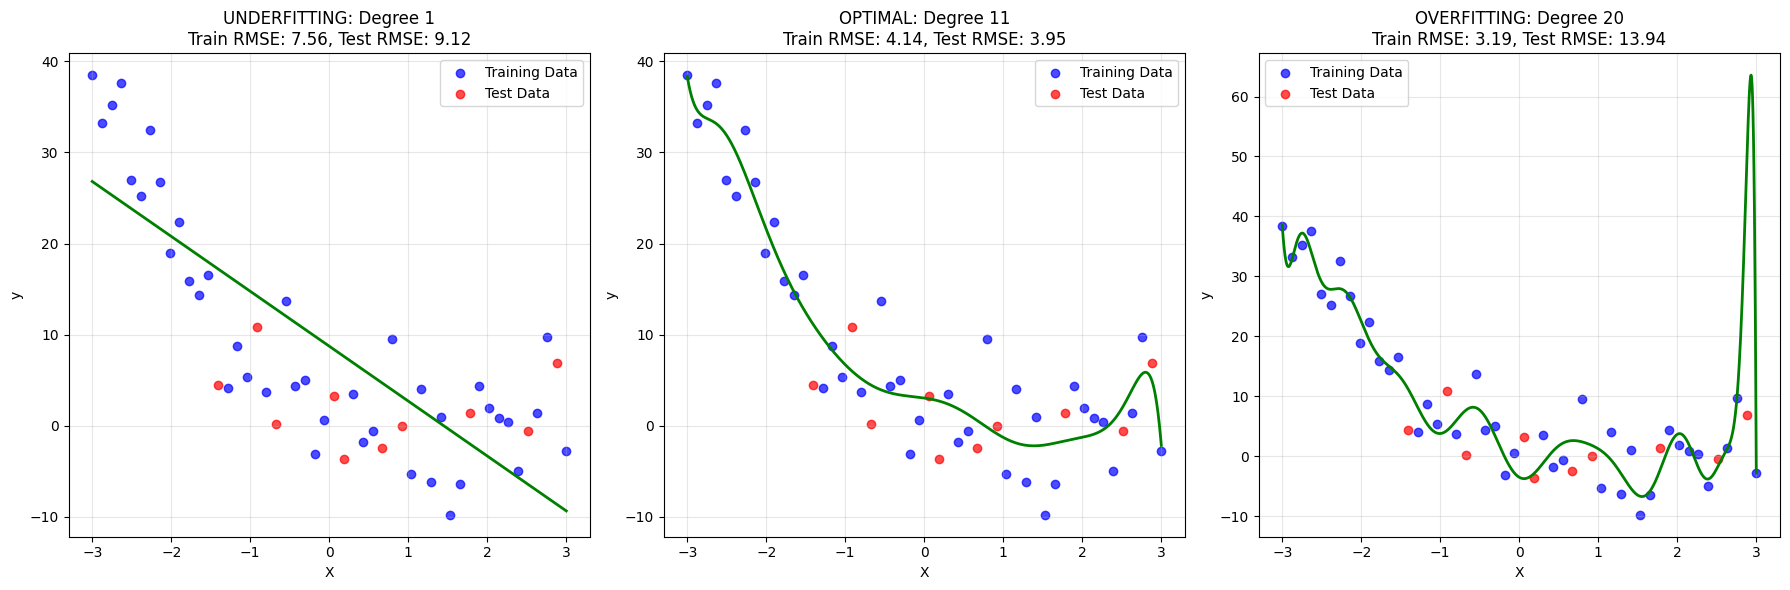


KEY INSIGHTS:
1. Underfitting (high bias): Model is too simple to capture the underlying pattern in the data
2. Optimal fit: Best balance between bias and variance
3. Overfitting (high variance): Model captures noise in the training data rather than just the signal

As model complexity (polynomial degree) increases:
- Training error generally decreases
- Test error follows a U-shaped curve
- The gap between training and test error typically widens with higher degrees


In [13]:
# ==========================================================================
# ANALYSIS OF MODEL PERFORMANCE
# ==========================================================================

# Find the best performing model (lowest test RMSE)
best_degree = degrees[np.argmin(test_rmses)]
best_test_rmse = min(test_rmses)
best_train_rmse = train_rmses[best_degree-1]

# Find the most underfitting model (highest training RMSE among low-degree polynomials)
# Typically the lowest degree (linear model) will underfit the most for non-linear data
underfit_degree = degrees[np.argmax(train_rmses[:5])]  # Look among the first 5 degrees
underfit_train_rmse = max(train_rmses[:5])
underfit_test_rmse = test_rmses[underfit_degree-1]

# Find the most overfitting model (largest gap between train and test RMSE)
# This typically occurs at very high degrees
rmse_gaps = [test_rmse - train_rmse for test_rmse, train_rmse in zip(test_rmses, train_rmses)]
overfit_degree = degrees[np.argmax(rmse_gaps)]
overfit_train_rmse = train_rmses[overfit_degree-1]
overfit_test_rmse = test_rmses[overfit_degree-1]
overfit_gap = overfit_test_rmse - overfit_train_rmse

# Print analysis results
print("\n" + "="*50)
print("POLYNOMIAL REGRESSION MODEL ANALYSIS")
print("="*50)

print("\nOPTIMAL MODEL:")
print(f"Best performing degree: {best_degree}")
print(f"Test RMSE: {best_test_rmse:.2f}")
print(f"Training RMSE: {best_train_rmse:.2f}")
print(f"Gap (Test - Train): {best_test_rmse - best_train_rmse:.2f}")

print("\nMOST UNDERFITTING MODEL:")
print(f"Most underfitting degree: {underfit_degree}")
print(f"Test RMSE: {underfit_test_rmse:.2f}")
print(f"Training RMSE: {underfit_train_rmse:.2f}")
print(f"Gap (Test - Train): {underfit_test_rmse - underfit_train_rmse:.2f}")
print("* High error on both training and test data indicates underfitting")

print("\nMOST OVERFITTING MODEL:")
print(f"Most overfitting degree: {overfit_degree}")
print(f"Test RMSE: {overfit_test_rmse:.2f}")
print(f"Training RMSE: {overfit_train_rmse:.2f}")
print(f"Gap (Test - Train): {overfit_gap:.2f}")
print("* Large gap between training and test error indicates overfitting")

# Create a visualization of these three specific models
plt.figure(figsize=(18, 6))

# 1. Underfitting model
plt.subplot(1, 3, 1)
w_underfit = polynomial_regression(X_train, y_train, underfit_degree)
y_fit_underfit = predict(X_fit, w_underfit)

plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test Data')
plt.plot(X_fit, y_fit_underfit, color='green', linewidth=2)
plt.title(f'UNDERFITTING: Degree {underfit_degree}\nTrain RMSE: {underfit_train_rmse:.2f}, Test RMSE: {underfit_test_rmse:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()

# 2. Optimal model
plt.subplot(1, 3, 2)
w_best = polynomial_regression(X_train, y_train, best_degree)
y_fit_best = predict(X_fit, w_best)

plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test Data')
plt.plot(X_fit, y_fit_best, color='green', linewidth=2)
plt.title(f'OPTIMAL: Degree {best_degree}\nTrain RMSE: {best_train_rmse:.2f}, Test RMSE: {best_test_rmse:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()

# 3. Overfitting model
plt.subplot(1, 3, 3)
w_overfit = polynomial_regression(X_train, y_train, overfit_degree)
y_fit_overfit = predict(X_fit, w_overfit)

plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Training Data')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Test Data')
plt.plot(X_fit, y_fit_overfit, color='green', linewidth=2)
plt.title(f'OVERFITTING: Degree {overfit_degree}\nTrain RMSE: {overfit_train_rmse:.2f}, Test RMSE: {overfit_test_rmse:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

# Print key insights about the bias-variance trade-off
print("\nKEY INSIGHTS:")
print("1. Underfitting (high bias): Model is too simple to capture the underlying pattern in the data")
print("2. Optimal fit: Best balance between bias and variance")
print("3. Overfitting (high variance): Model captures noise in the training data rather than just the signal")
print("\nAs model complexity (polynomial degree) increases:")
print("- Training error generally decreases")
print("- Test error follows a U-shaped curve")
print("- The gap between training and test error typically widens with higher degrees")


### **Hint**: 

##### You can see an amazing **animation** of these codes in the file with a similar name but with a .py extension. This will help you understand clearly what happens in this method.
